In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [4]:
file_path = r"C:\Users\vatch\Downloads\archive (42)\goldstock v1.csv"
df = pd.read_csv( r"C:\Users\vatch\Downloads\archive (42)\goldstock v1.csv")
df.head()

,Unnamed: 0,Date,Close,Volume,Open,High,Low
0,0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


In [5]:
print(df.columns)
print(df.head())


Index(['Unnamed: 0', 'Date', 'Close', 'Volume', 'Open', 'High', 'Low'], dtype='object')
   Unnamed: 0        Date   Close    Volume    Open    High     Low
0           0  2024-01-19  2029.3  166078.0  2027.4  2041.9  2022.2
1           1  2024-01-18  2021.6  167013.0  2009.1  2025.6  2007.7
2           2  2024-01-17  2006.5  245194.0  2031.7  2036.1  2004.6
3           3  2024-01-16  2030.2  277995.0  2053.4  2062.8  2027.6
4           4  2024-01-12  2051.6  250946.0  2033.2  2067.3  2033.1


In [8]:
value_column = 'Close'  
data = df[value_column].values.reshape(-1, 1)
print(data)

[[2029.3]
 [2021.6]
 [2006.5]
 ...
 [1264.5]
 [1262.5]
 [1238.6]]


In [9]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

X, y = [], []
seq_len = 20
for i in range(len(data_scaled) - seq_len):
    X.append(data_scaled[i:i+seq_len])
    y.append(data_scaled[i+seq_len])
X, y = np.array(X), np.array(y)


In [10]:
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

model = Sequential([
    LSTM(64, input_shape=(seq_len, 1)),
    Dense(1)
])


D:\folder desktop\ttt\env\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))


Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3756 - val_loss: 0.0132
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0117 - val_loss: 0.0089
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0102 - val_loss: 0.0063
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0101 - val_loss: 0.0056
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0086 - val_loss: 0.0049
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0083 - val_loss: 0.0046
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0085 - val_loss: 0.0059
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0082 - val_loss: 0.0043
Epoch 9/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0072 - val_loss: 0.0040
Epoch 10/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0067 - val_loss: 0.0039
Epoch 11/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0069 - val_loss: 0.0040
Epoch 12/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0066 - val_l

In [12]:
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


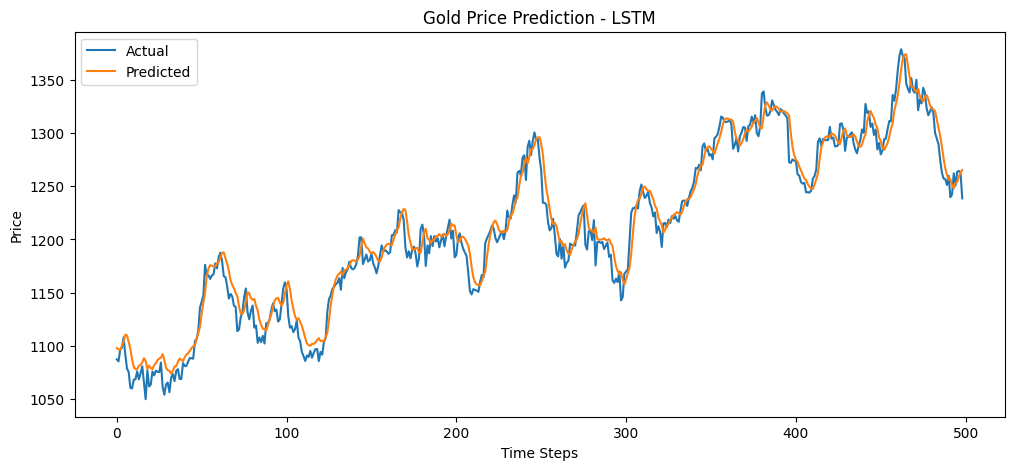

In [13]:
plt.figure(figsize=(12, 5))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title("Gold Price Prediction - LSTM")
plt.xlabel("Time Steps")
plt.ylabel("Price")
plt.legend()
plt.show()


In [14]:
mse_lstm = mean_squared_error(y_test_inv, y_pred_inv)
print(f"🔹 LSTM Test MSE: {mse_lstm:.4f}")


🔹 LSTM Test MSE: 193.5976


In [16]:
print("\n🔸 MSE Comparison:")
print(f"{'Model':<10} | {'MSE':<10}")
print("-" * 25)
print(f"{'RNN':<10} | {'(from Task 4)':<10}")  
print(f"{'LSTM':<10} | {mse_lstm:<10.4f}")

print("\n✅ Note on LSTM vs RNN:")
print("LSTM handles long-term dependencies better than simple RNNs by using gates that prevent vanishing gradient issues.")



🔸 MSE Comparison:
Model      | MSE       
-------------------------
RNN        | (from Task 4)
LSTM       | 193.5976  

✅ Note on LSTM vs RNN:
LSTM handles long-term dependencies better than simple RNNs by using gates that prevent vanishing gradient issues.
